In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
data = pd.read_csv('C:\\Users\\LEGION\\Documents\\bank_data_train_d02.csv\\bank_data_train_d02.csv', index_col='ID')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET',axis=1), data['TARGET'], test_size=0.2, random_state=21)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
data1 = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'roc_auc')

In [6]:
data1,\
data1.mean()*100

(array([0.74560109, 0.74738986, 0.74907082, 0.73928071, 0.74662717]),
 74.5593929670574)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf2 = DecisionTreeClassifier(random_state=21)
data2 = cross_val_score(clf2, X_train, y_train, cv=5, scoring = 'roc_auc')
data2,\
data2.mean()*100

(array([0.58661854, 0.58097801, 0.58161613, 0.58613487, 0.58683596]),
 58.44367026890801)

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(random_state=21)
data3 = cross_val_score(clf3, X_train, y_train, cv=5, scoring = 'roc_auc')
data3,\
data3.mean()*100

(array([0.81614526, 0.81562656, 0.82141316, 0.80706198, 0.81436966]),
 81.49233258961273)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(random_state=21)
data4 = cross_val_score(clf4, X_train, y_train, cv=5, scoring = 'roc_auc')
data4,\
data4.mean()*100

(array([0.8308704 , 0.82904616, 0.8355422 , 0.82728423, 0.83267754]),
 83.1084106663536)

# ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ ДЕРЕВА РЕШЕНИЙ

## RandomForestClassifier

In [17]:
clf3_1 = RandomForestClassifier(n_estimators=50, random_state=21)
data3_1 = cross_val_score(clf3_1, X_train, y_train, cv=5, scoring = 'roc_auc')
data3_1.mean() * 100 

80.09170139366701

In [18]:
clf3_2 = RandomForestClassifier(n_estimators=200, random_state=21)
data3_2 = cross_val_score(clf3_2, X_train, y_train, cv=5, scoring = 'roc_auc')
data3_2.mean() * 100 

82.1686526713114

In [19]:
clf3_3 = RandomForestClassifier(max_depth=10, random_state=21)
data3_3 = cross_val_score(clf3_3, X_train, y_train, cv=5, scoring = 'roc_auc')
data3_3.mean() * 100 

79.67325656740654

## GradientBoostingClassifier

In [22]:
clf4_1 = GradientBoostingClassifier(random_state=21, max_depth=10)
data4_1 = cross_val_score(clf4_1, X_train, y_train, cv=5, scoring = 'roc_auc')
data4_1.mean() * 100 

84.28556885612544

In [11]:
clf4_2 = GradientBoostingClassifier(random_state=21, n_estimators=200)
data4_2 = cross_val_score(clf4_2, X_train, y_train, cv=5, scoring = 'roc_auc')
data4_2.mean() * 100 

83.80712121489873

In [12]:
clf4_3 = GradientBoostingClassifier(random_state=21, learning_rate=0.5)
data4_3 = cross_val_score(clf4_3, X_train, y_train, cv=5, scoring = 'roc_auc')
data4_3.mean() * 100 

83.89229105283722

## ЛУЧШИЕ МОДЕЛИ

In [13]:
from sklearn.metrics import roc_auc_score
import pickle
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# <span style="color:green">График RandomForestClassifier</span>

In [14]:
clf_RandomForest = RandomForestClassifier(n_estimators=200, random_state=21)
RandomForest_best = clf_RandomForest.fit(X_train, y_train)

In [15]:
RandomForest_test = RandomForest_best.predict_proba(X_test)
roc_auc_RandomForest = roc_auc_score(y_test, RandomForest_test[:,1])
roc_auc_RandomForest

0.8274789489789439

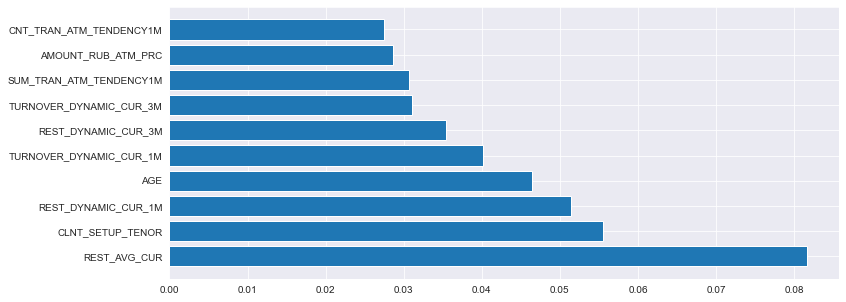

In [16]:
f_importances(abs(RandomForest_best.feature_importances_), X_train.columns, top=10)

# <span style="color:green">График GradientBoostingClassifier</span>

In [17]:
clf_GBC = GradientBoostingClassifier(random_state=21, max_depth=10)
GBC_best = clf_GBC.fit(X_train, y_train)
GBC_test = GBC_best.predict_proba(X_test)
roc_auc_GBC = roc_auc_score(y_test, GBC_test[:,1])
roc_auc_GBC

0.8507199762844946

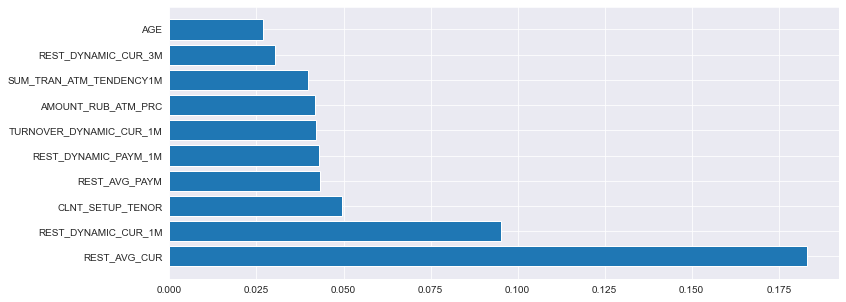

In [18]:
f_importances(abs(GBC_best.feature_importances_), X_train.columns, top=10)

In [19]:
model2 = 'best_model.sav'
pickle.dump(clf_GBC, open(model2, 'wb'))
loaded_model2 = pickle.load(open(model2, 'rb'))
test_GBC = loaded_model2.predict_proba(X_test)
test2 = roc_auc_score(y_test, test_GBC[:,1])
test2

0.8507199762844946